In [1]:
suppressMessages(suppressWarnings(source("/home/mount/project/config_sing.R")))
print(FD_RES)

[1] "/home/mount/work/out/proj_combeffect"


In [2]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_marginal_input20x_chrX.tsv"
fpath = file.path(fdiry, fname)

dat_chrX_inp20x = read_tsv(fpath)
head(dat_chrX_inp20x)

Rows: 484 Columns: 7

── Column specification ─────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Motif, Sample
dbl (5): Estimate, Std. Error, t value, Raw_pvalue, Adjusted_pvalue


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Motif,Sample,Estimate,Std. Error,t value,Raw_pvalue,Adjusted_pvalue
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AIRE,XXTFX_DMSO,-4.090914e-06,4.160827e-07,-9.8319732,1.856234e-06,5.580232e-06
AIRE,XXTFX_Dex,-9.155318e-07,4.385897e-07,-2.0874449,6.340050e-02,8.315946e-02
AP1_1,XXTFX_DMSO,3.580264e-04,7.588312e-06,47.1812940,4.410421e-13,7.115480e-11
AP1_1,XXTFX_Dex,2.593386e-06,7.998783e-06,0.3242225,7.524494e-01,7.899903e-01
AP1_2,XXTFX_DMSO,3.121404e-04,2.021096e-05,15.4441150,2.640582e-08,1.374238e-07
AP1_2,XXTFX_Dex,-1.453918e-04,2.130422e-05,-6.8245545,4.599725e-05,1.080712e-04


In [3]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_marginal_chrX.tsv"
fpath = file.path(fdiry, fname)

dat_chrX = read_tsv(fpath)
head(dat_chrX)

Rows: 484 Columns: 7

── Column specification ─────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Motif, Sample
dbl (5): Estimate, Std. Error, t value, Raw_pvalue, Adjusted_pvalue


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Motif,Sample,Estimate,Std. Error,t value,Raw_pvalue,Adjusted_pvalue
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AIRE,XXTFX_DMSO,-4.474338e-06,4.864387e-07,-9.1981547,3.400725e-06,1.003629e-05
AIRE,XXTFX_Dex,-8.373816e-07,5.127514e-07,-1.6331142,1.334940e-01,1.631593e-01
AP1/1,XXTFX_DMSO,3.517318e-04,8.132310e-06,43.2511544,1.048361e-12,6.583571e-11
AP1/1,XXTFX_Dex,4.270858e-06,8.572208e-06,0.4982215,6.291025e-01,6.691991e-01
AP1/2,XXTFX_DMSO,2.999107e-04,2.066025e-05,14.5163139,4.788762e-08,2.294812e-07
AP1/2,XXTFX_Dex,-1.461208e-04,2.177782e-05,-6.7096147,5.300889e-05,1.263857e-04


In [5]:
fun = function(motifs){
    res = sapply(motifs, function(motif){
        if (motif == "NR_20"){ return("red") }
        if (motif == "NR/20"){ return("red") }
        if (motif == "AP1_1"){ return("blue") }
        if (motif == "AP1/1"){ return("blue") }
        return("grey50")
    })
    return(res)
}

In [6]:
lst_dat = list(dat_chrX, dat_chrX_inp20x)
lst_dat = lapply(lst_dat, function(dat){
    dat$Color = fun(dat$Motif)
    return(dat)
})

In [13]:
lst_gpt = lapply(lst_dat, function(dat){
    gpt = ggplot(dat, aes(x=Estimate, y=-log10(Adjusted_pvalue))) + 
        geom_point(size=0.7, color=dat$Color) + 
        geom_hline(yintercept = 2, color="red", alpha=0.5) +
        labs(x="Estimate", y="-log10(adj. p-value (BH))") +
        theme_bw() + 
        facet_wrap(~Sample)
    return(gpt)
})
lst_gpt[[1]] = lst_gpt[[1]] + ggtitle("ChrX (Old input)")
lst_gpt[[2]] = lst_gpt[[2]] + ggtitle("ChrX (New input)")

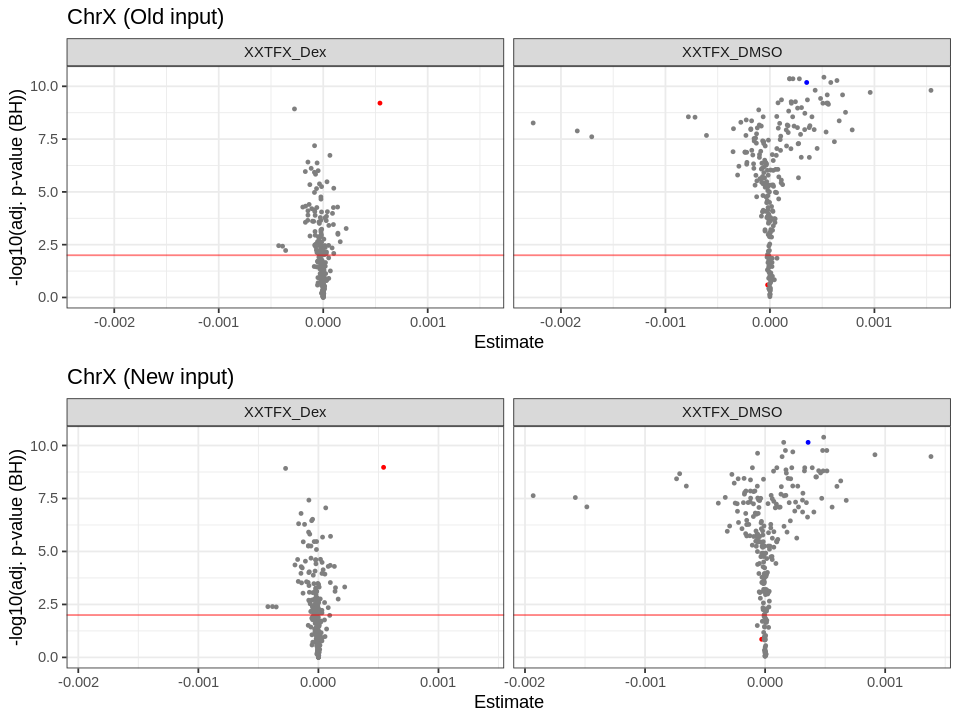

In [17]:
options(repr.plot.height=6, repr.plot.width=8)
grid.arrange(grobs = lst_gpt, nrow = 2)

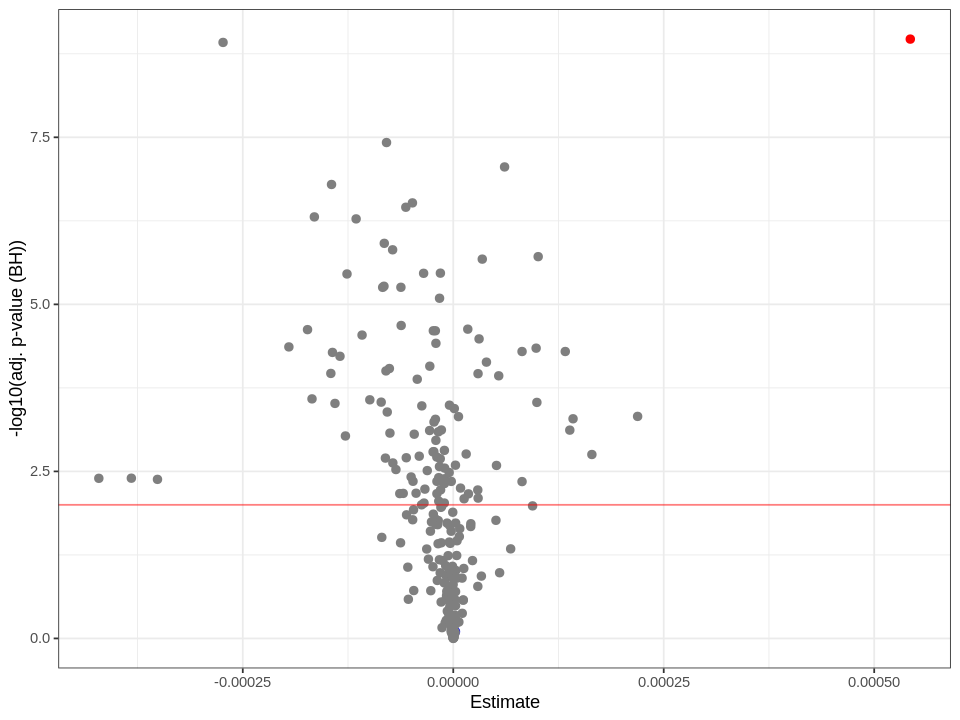

In [28]:
#dat = dat_chrX_inp20x %>% dplyr::filter(Sample == "XXTFX_Dex")
options(repr.plot.height=6, repr.plot.width=8)
dat = lst_dat[[2]]
dat = dat %>% dplyr::filter(Sample == "XXTFX_Dex")
gpt = ggplot(dat, aes(x=Estimate, y=-log10(Adjusted_pvalue))) + 
        geom_point(size=2, color=dat$Color) + 
        geom_hline(yintercept = 2, color="red", alpha=0.5) +
        labs(x="Estimate", y="-log10(adj. p-value (BH))") +
        theme_bw()
print(gpt)

Warning message:
“Removed 61 rows containing missing values (geom_point).”


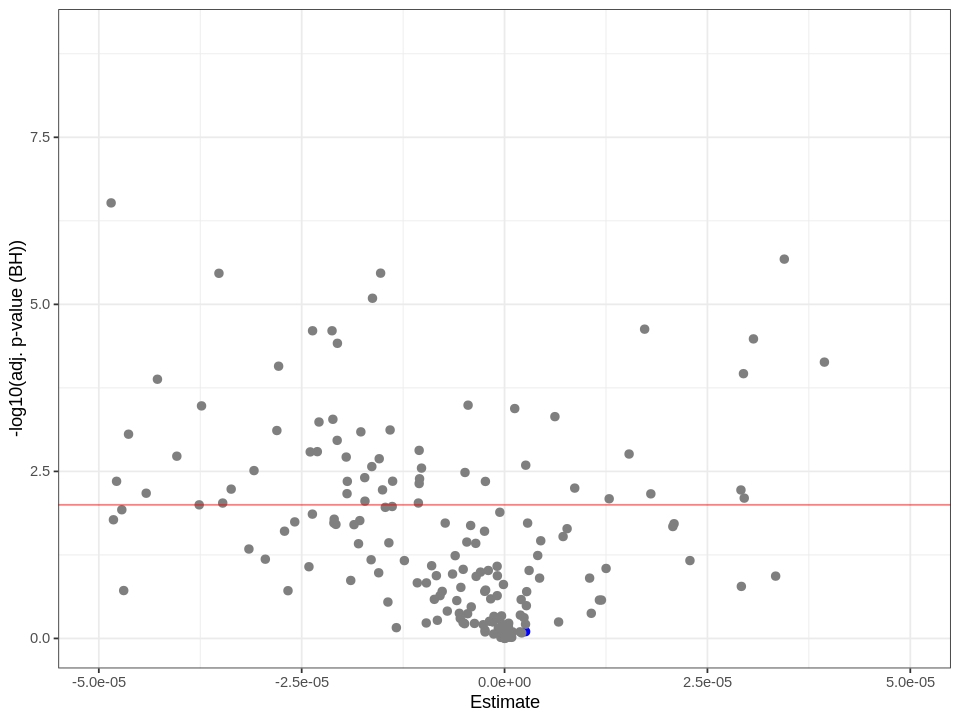

In [39]:
#dat = dat_chrX_inp20x %>% dplyr::filter(Sample == "XXTFX_Dex")
options(repr.plot.height=6, repr.plot.width=8)
dat = lst_dat[[2]]
dat = dat %>% dplyr::filter(Sample == "XXTFX_Dex")
gpt = ggplot(dat, aes(x=Estimate, y=-log10(Adjusted_pvalue))) + 
        geom_point(size=2, color=dat$Color) + 
        geom_hline(yintercept = 2, color="red", alpha=0.5) +
        labs(x="Estimate", y="-log10(adj. p-value (BH))") +
        theme_bw() +
        xlim(-0.00005, 0.00005)
print(gpt)

In [38]:
tmp = dat %>% dplyr::filter(Estimate >= -0.00005, Estimate <= 0.00005, Adjusted_pvalue<0.001)
tmp

Motif,Sample,Estimate,Std. Error,t value,Raw_pvalue,Adjusted_pvalue,Color
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BATF,XXTFX_Dex,-2.126056e-05,2.592066e-06,-8.202168,9.456602e-06,2.485317e-05,grey50
CENBP,XXTFX_Dex,-1.527408e-05,1.459120e-06,-10.468002,1.043606e-06,3.412873e-06,grey50
CREB_ATF_1,XXTFX_Dex,-2.059780e-05,2.649357e-06,-7.774639,1.511019e-05,3.828969e-05,grey50
CUX_2,XXTFX_Dex,-2.115726e-05,3.841884e-06,-5.507000,2.592316e-04,5.249712e-04,grey50
E2F_4,XXTFX_Dex,-1.410571e-05,2.696807e-06,-5.230521,3.840051e-04,7.586060e-04,grey50
GMEB2_1,XXTFX_Dex,1.252450e-06,2.163152e-07,5.789931,1.753455e-04,3.626804e-04,grey50
HD_10,XXTFX_Dex,1.726144e-05,2.087223e-06,8.270049,8.793535e-06,2.351421e-05,grey50
KAISO,XXTFX_Dex,-3.519742e-05,3.366758e-06,-10.454395,1.056213e-06,3.430920e-06,grey50
KLF_SP_3,XXTFX_Dex,-4.633792e-05,9.086278e-06,-5.099769,4.641835e-04,8.775969e-04,grey50


In [27]:
tmp = dat %>% dplyr::filter(Estimate >= -0.0005, Estimate <= 0.00005)

Motif,Sample,Estimate,Std. Error,t value,Raw_pvalue,Adjusted_pvalue,Color
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AIRE,XXTFX_Dex,-9.155318e-07,4.385897e-07,-2.08744492,6.340050e-02,8.315946e-02,grey50
AP1_1,XXTFX_Dex,2.593386e-06,7.998783e-06,0.32422251,7.524494e-01,7.899903e-01,blue
AP1_2,XXTFX_Dex,-1.453918e-04,2.130422e-05,-6.82455445,4.599725e-05,1.080712e-04,grey50
BATF,XXTFX_Dex,-2.126056e-05,2.592066e-06,-8.20216755,9.456602e-06,2.485317e-05,grey50
BCL6_1,XXTFX_Dex,-8.853333e-07,4.738462e-07,-1.86839803,9.124784e-02,1.153106e-01,grey50
BCL6_2,XXTFX_Dex,-4.550282e-07,8.549970e-06,-0.05321986,9.586049e-01,9.645837e-01,grey50
CCAAT_CEBP,XXTFX_Dex,2.046279e-06,1.572851e-06,1.30100054,2.224361e-01,2.619443e-01,grey50
CENBP,XXTFX_Dex,-1.527408e-05,1.459120e-06,-10.46800198,1.043606e-06,3.412873e-06,grey50
CREB_ATF_1,XXTFX_Dex,-2.059780e-05,2.649357e-06,-7.77463900,1.511019e-05,3.828969e-05,grey50
